In [1]:
import pandas as pd
import glob, os
import matplotlib.pyplot as plt
from transformers import pipeline

from __future__ import unicode_literals
import spacy,en_core_web_sm
from spacy.lang.en import English
from spacy.matcher import Matcher
import textacy
import string
from wordcloud import WordCloud, STOPWORDS 
import numpy as np
import nltk
import locationtagger

C:\Users\Asus\anaconda3\envs\pyspark\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [2]:
class Trantor:
    
    def __init__(self):
        pass
        self.all_records_raw_df = self.read_data()
        self.all_records_cleaned_df = self.data_cleaner()
        
    def test(self):
        print("sda asdff")

    def read_data(self):

        path = 'data_prueba/'
        all_records = []

        for fname in glob.glob(path + '*.pickle'):
            obj = pd.read_pickle(fname)
            record = [obj['id'],obj['name'],obj['audience_size'],
                      obj['country'],obj['topic']]
            all_records = all_records + [record]
        
        all_records_df = pd.DataFrame.from_records(all_records)
        all_records_df.columns = ['id','name','audience_size','country','topic']
        
        return all_records_df
    
    def number_of_verb(self, string):
        verbs = []
        pattern = [{'POS': 'VERB', 'OP': '?'},\
               {'POS': 'VERB', 'OP': '+'}]
        doc = textacy.make_spacy_doc(string, lang='en_core_web_sm')
        lists = textacy.extract.matches.token_matches(doc, [pattern])
        for list in lists:
            verbs.append(list.text)
            
        return len(verbs)
    
    def number_letters(self, string):
        return len([i for i in string if i.isalpha()])
    
    def location(self, string):
        place_entity = locationtagger.find_locations(text = string)
        countries = place_entity.countries
        regions = place_entity.regions
        cities = place_entity.cities
        X = countries + regions + cities
        return X
    
    
    def data_cleaner(self):
        
        self.all_records_raw_df['name_cleaned'] = self.all_records_raw_df.name\
        .apply(lambda row: row.translate(str.maketrans('', '', string.punctuation)))
        
        self.all_records_raw_df['number_of_verb'] = self.all_records_raw_df.name_cleaned\
        .apply(lambda row: self.number_of_verb(row))
        
        self.all_records_raw_df['number_words'] = self.all_records_raw_df.name_cleaned\
        .apply(lambda row: len(row.split()))
            
        self.all_records_raw_df['number_letters'] = self.all_records_raw_df.name_cleaned\
        .apply(lambda row: self.number_letters(row))
        
        self.all_records_raw_df['number_letters_words_verbs'] = self.all_records_raw_df.number_letters.\
        apply(lambda row: [row]) + self.all_records_raw_df.number_words.apply(lambda row: [row]) + \
        self.all_records_raw_df.number_of_verb.apply(lambda row: [row])
         
        self.all_records_raw_df['geopolitical entity'] =  self.all_records_raw_df.name_cleaned\
        .apply(lambda row: self.location(row))  
        return self.all_records_raw_df
     
        
    def word_cloud(self):
        string = self.all_records_raw_df.name_cleaned
        comment_words = ''
        stopwords = set(STOPWORDS)
        for val in string:

            # typecaste each val to string
            val = str(val)

            # split the value
            tokens = val.split()

            # Converts each token into lowercase
            for i in range(len(tokens)):
                tokens[i] = tokens[i].lower()

            comment_words += " ".join(tokens)+" "

        wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)

        # plot the WordCloud image                      
        plt.figure(figsize = (8, 8), facecolor = None)
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.tight_layout(pad = 0)

        plt.show()   

In [3]:
trantor = Trantor()

In [4]:
trantor.all_records_cleaned_df

,id,name,audience_size,country,topic,name_cleaned,number_of_verb,number_words,number_letters,number_letters_words_verbs,geopolitical entity
0,6003407352218,#Te Amo,38302730,None,None,Te Amo,0,2,5,"[5, 2, 0]",[]
1,6003195700298,(500) Days of Summer,456210,None,None,500 Days of Summer,0,4,12,"[12, 4, 0]",[]
2,6002964102317,1 LIVE,1333240,None,None,1 LIVE,0,2,4,"[4, 2, 0]",[]
3,6003305598969,1&1 Internet,1372910,None,None,11 Internet,0,2,8,"[8, 2, 0]",[]
4,6003311804999,1-800-Flowers,1816950,None,None,1800Flowers,0,1,7,"[7, 1, 0]",[]
5,6003260208557,1. F.C. Colonia,2257600,None,None,1 FC Colonia,0,3,9,"[9, 3, 0]",[]
6,6003062855582,1. FSV Mainz 05,6858200,None,None,1 FSV Mainz 05,0,4,8,"[8, 4, 0]",[]
7,6003064748985,2 Broke Girls,400340,None,None,2 Broke Girls,0,3,10,"[10, 3, 0]",[Broke]
8,6006211190019,2 Chainz,4152727,None,None,2 Chainz,0,2,6,"[6, 2, 0]",[]
9,6011504545389,2 Guns,105750,None,None,2 Guns,0,2,4,"[4, 2, 0]",[]


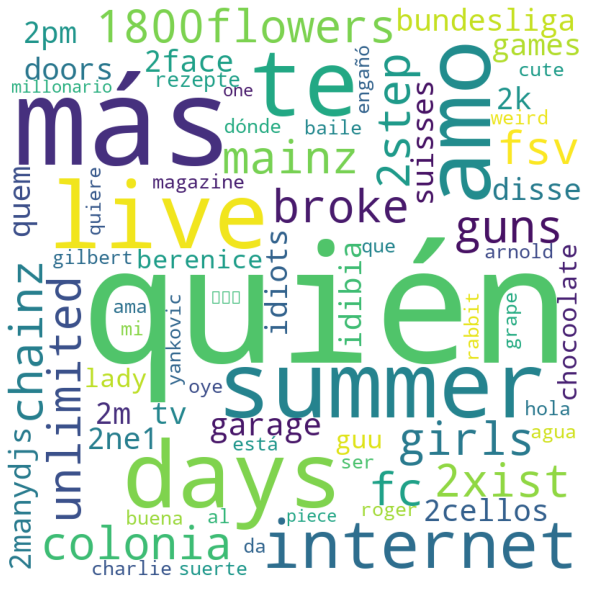

In [5]:
trantor.word_cloud()